In [1]:
# Imports & Dataset Preparation
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import scatter
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from seaborn import heatmap, countplot
iris = load_iris()
print('Iris dataset details:')
print('Features:', iris.feature_names)
print('Target classes:', iris.target_names)
chosen_feature = 2
X = iris.data[:,chosen_feature]
y = iris.target
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Iris dataset details:
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [2]:
# Logistic Regression Implementation

class LogisticRegressionModel():
    def __init__(self, X, y, learning_rate=0.05, iterations=10000):      
        self.learning_rate = learning_rate
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        self.m, self.n = self.X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        for i in range(iterations):
            self.update_weights()
            
    def update_weights(self) :           
        a = 1/(1+np.exp(-(self.X.dot(self.W)+self.b))) 
        dz = a - self.y.T        
        dz = np.reshape(dz, self.m)        
        dW = np.dot(self.X.T, dz)/self.m         
        db = np.sum(dz)/self.m
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
    
    def predict_proba(self, X):
        return 1/(1 + np.exp(-(X.dot(self.W)+self.b)))

    def predict(self, X):
        Z = self.predict_proba(X)     
        y = np.where(Z > 0.5, 1, 0)
        return y

# One vs Rest Classification using Logistic Regression

### Custom Implementation

In [3]:
# One-Many Classifier

class OneOnManyClassifier:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self._classes = classes = sorted(set(y))
        self._classifiers = classifiers = []
        self._classified_data = classified_data = {}
        for Xi, yi in zip(X, y):
            classified_data[yi] = classified_data.get(yi, [])+[Xi]
        # Generate n classifiers
        for i, ci in enumerate(classes):
            X_ci = classified_data[ci]
            y_ci = [1]*len(X_ci)
            X_cr = []
            for j, cj in enumerate(classes):
                if i==j: continue
                X_cr+=classified_data[cj]
            y_cr = [0]*len(X_cr)
            model = LogisticRegressionModel(X_ci+X_cr, y_ci+y_cr)
            classifiers.append(model)

    def predict(self, X):
        ys = []
        for classifier in self._classifiers:
            ys.append(classifier.predict_proba(X))
        y = []
        for i in range(len(X)):
            for j, ysj in enumerate(ys):
                v = ysj[i]
                if j==0 or v>mv:
                    mv = v
                    m = j
            yi = self._classes[m]
            y.append(yi)
        return y

No. of binary classifiers used: 3
Accuracy: 0.9666666666666667

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



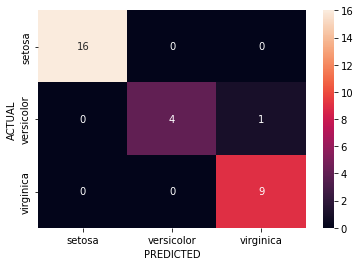

In [4]:
# Using Custom-Written Code

custom_classifier = OneOnManyClassifier(X_train, y_train)
y_prediction = custom_classifier.predict(X_test)

print('No. of binary classifiers used:', len(custom_classifier._classifiers))
print('Accuracy:', accuracy_score(y_test, y_prediction))
print('\nClassification Report:\n\n', classification_report(y_test, y_prediction, target_names=iris.target_names))
c_m = confusion_matrix(y_test, y_prediction)
h_m = heatmap(data=c_m, annot=True, fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
h_m.set(xlabel='PREDICTED', ylabel='ACTUAL')
display(h_m)

### Custom Implementation with SKLearn Logistic Regression

In [5]:
# One-Many Classifier

class OneOnManyClassifierSKL:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self._classes = classes = sorted(set(y))
        self._classifiers = classifiers = []
        self._classified_data = classified_data = {}
        for Xi, yi in zip(X, y):
            classified_data[yi] = classified_data.get(yi, [])+[Xi]
        # Generate n classifiers
        for i, ci in enumerate(classes):
            X_ci = classified_data[ci]
            y_ci = [1]*len(X_ci)
            X_cr = []
            for j, cj in enumerate(classes):
                if i==j: continue
                X_cr+=classified_data[cj]
            y_cr = [0]*len(X_cr)
            model = LogisticRegression(random_state = 0)
            model.fit(X_ci+X_cr, y_ci+y_cr)
            classifiers.append(model)

    def predict(self, X):
        ys = []
        for classifier in self._classifiers:
            ys.append(classifier.predict_proba(X)[:,1])
        y = []
        for i in range(len(X)):
            for j, ysj in enumerate(ys):
                v = ysj[i]
                if j==0 or v>mv:
                    mv = v
                    m = j
            yi = self._classes[m]
            y.append(yi)
        return y

No. of binary classifiers used: 3
Accuracy: 0.9666666666666667

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



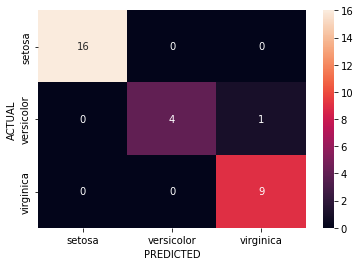

In [6]:
# Using Custom-Written Code

custom_classifier = OneOnManyClassifierSKL(X_train, y_train)
y_prediction = custom_classifier.predict(X_test)

print('No. of binary classifiers used:', len(custom_classifier._classifiers))
print('Accuracy:', accuracy_score(y_test, y_prediction))
print('\nClassification Report:\n\n', classification_report(y_test, y_prediction, target_names=iris.target_names))
c_m = confusion_matrix(y_test, y_prediction)
h_m = heatmap(data=c_m, annot=True, fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
h_m.set(xlabel='PREDICTED', ylabel='ACTUAL')
display(h_m)

### SKlearn

Accuracy: 0.9666666666666667

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



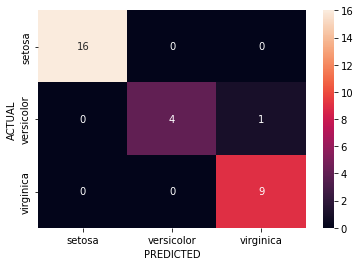

In [7]:
# Using SKlearn

model = LogisticRegression(random_state = 0)
classifier = OneVsRestClassifier(model)
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_prediction))
print('\nClassification Report:\n\n', classification_report(y_test, y_prediction, target_names=iris.target_names))
c_m = confusion_matrix(y_test, y_prediction)
h_m = heatmap(data=c_m, annot=True, fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
h_m.set(xlabel='PREDICTED', ylabel='ACTUAL')
display(h_m)

# One vs One Classifier using Logistic Regression

### Custom Implementation

In [8]:
# One-One Classifier

class OneOnOneClassifier:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self._classes = classes = sorted(set(y))
        self._classifiers = classifiers = []
        self._classified_data = classified_data = {}
        for Xi, yi in zip(X, y):
            classified_data[yi] = classified_data.get(yi, [])+[Xi]
        # Generate n*(n-1)/2 classifiers
        for i, ci in enumerate(classes):
            X_ci = classified_data[ci]
            y_ci = [1]*len(X_ci)
            for cj in classes[i+1:]:
                X_cj = classified_data[cj]
                y_cj = [0]*len(X_cj)
                model = LogisticRegressionModel(X_ci+X_cj, y_ci+y_cj)
                classifiers.append((model, ci, cj))

    def predict(self, X):
        ys = []
        for model, ci, cj in self._classifiers:
            y_p = model.predict(X)
            y_p = np.where(y_p==1, ci, cj)
            ys.append(y_p)
        y = []
        for i in range(len(X)):
            d = {}
            for j, ysj in enumerate(ys):
                v = ysj[i]
                d[v] = d.get(v, 0)+1
            yi = sorted(d, key=lambda x:d[x])[-1]
            y.append(yi)
        return y

No. of binary classifiers used: 3
Accuracy: 0.9666666666666667

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



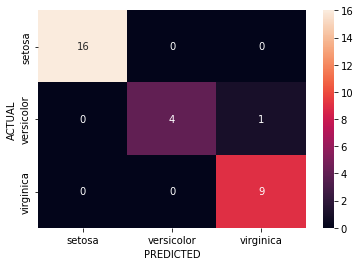

In [9]:
# Using Custom-Written Code

custom_classifier = OneOnOneClassifier(X_train, y_train)
y_prediction = custom_classifier.predict(X_test)

print('No. of binary classifiers used:', len(custom_classifier._classifiers))
print('Accuracy:', accuracy_score(y_test, y_prediction))
print('\nClassification Report:\n\n', classification_report(y_test, y_prediction, target_names=iris.target_names))
c_m = confusion_matrix(y_test, y_prediction)
h_m = heatmap(data=c_m, annot=True, fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
h_m.set(xlabel='PREDICTED', ylabel='ACTUAL')
display(h_m)

### Custom Implementation with SKLearn Logistic Regression

In [10]:
# One-Many Classifier

class OneOnManyClassifierSKL:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self._classes = classes = sorted(set(y))
        self._classifiers = classifiers = []
        self._classified_data = classified_data = {}
        for Xi, yi in zip(X, y):
            classified_data[yi] = classified_data.get(yi, [])+[Xi]
        # Generate n classifiers
        for i, ci in enumerate(classes):
            X_ci = classified_data[ci]
            y_ci = [1]*len(X_ci)
            X_cr = []
            for j, cj in enumerate(classes):
                if i==j: continue
                X_cr+=classified_data[cj]
            y_cr = [0]*len(X_cr)
            model = LogisticRegression(random_state = 0)
            model.fit(X_ci+X_cr, y_ci+y_cr)
            classifiers.append(model)

    def predict(self, X):
        ys = []
        for classifier in self._classifiers:
            ys.append(classifier.predict_proba(X)[:,1])
        y = []
        for i in range(len(X)):
            for j, ysj in enumerate(ys):
                v = ysj[i]
                if j==0 or v>mv:
                    mv = v
                    m = j
            yi = self._classes[m]
            y.append(yi)
        return y

No. of binary classifiers used: 3
Accuracy: 0.9666666666666667

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



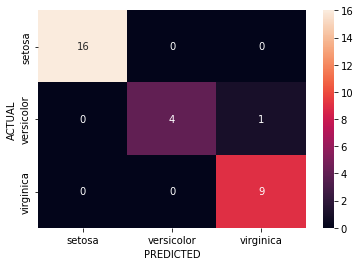

In [11]:
# Using Custom-Written Code

custom_classifier = OneOnManyClassifierSKL(X_train, y_train)
y_prediction = custom_classifier.predict(X_test)

print('No. of binary classifiers used:', len(custom_classifier._classifiers))
print('Accuracy:', accuracy_score(y_test, y_prediction))
print('\nClassification Report:\n\n', classification_report(y_test, y_prediction, target_names=iris.target_names))
c_m = confusion_matrix(y_test, y_prediction)
h_m = heatmap(data=c_m, annot=True, fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
h_m.set(xlabel='PREDICTED', ylabel='ACTUAL')
display(h_m)

### SKlearn

Accuracy: 0.9666666666666667

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



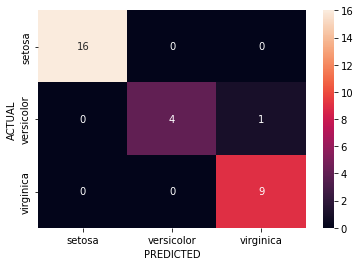

In [12]:
# Using Sklearn

model = LogisticRegression(random_state = 0)
classifier = OneVsOneClassifier(model)
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_prediction))
print('\nClassification Report:\n\n', classification_report(y_test, y_prediction, target_names=iris.target_names))
c_m = confusion_matrix(y_test, y_prediction)
h_m = heatmap(data=c_m, annot=True, fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
h_m.set(xlabel='PREDICTED', ylabel='ACTUAL')
display(h_m)